In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# Loading the MNIST dataset
(x_train,y_train),(x_test,y_test)= keras.datasets.mnist.load_data()

In [3]:
# Normalize the pixel values between 0 and 1(graychannel as 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Define the ANN Model Architecture

model = keras.Sequential( [
    keras.layers.Flatten(input_shape=(28,28)),  # Convert the 28x28 Image into a 1D Array
    keras.layers.Dense(128,activation='relu'),  # Hidden Layer with 128 Units #relu for binary
    keras.layers.Dense(10,activation='softmax')  #Output Layer with 10 units  #softmax for multiclass
])

In [5]:
# Compile the Model
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [6]:
history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2583 - accuracy: 0.9257 - val_loss: 0.1488 - val_accuracy: 0.9553
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1173 - accuracy: 0.9652 - val_loss: 0.1038 - val_accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0809 - accuracy: 0.9756 - val_loss: 0.0915 - val_accuracy: 0.9717
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0611 - accuracy: 0.9811 - val_loss: 0.0879 - val_accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0797 - val_accuracy: 0.9754


In [7]:
# Predict the Labels of the test Set
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 0s 990us/step


In [8]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
# Print the Confusion Matrix
print('Confusion Matrix')
print(cm)

# Calculate the Accuracy
acc=accuracy_score(y_test,y_pred)

# Printing the Accuracy
print('Accuracy :',acc)

Confusion Matrix
[[ 968    1    1    0    0    5    3    1    1    0]
 [   0 1125    3    1    0    1    2    0    3    0]
 [   5    4 1002    2    1    0    2    6   10    0]
 [   0    0    3  984    0   13    0    5    5    0]
 [   2    2    5    1  935    3    6    4    4   20]
 [   3    0    0    4    1  876    2    0    5    1]
 [   3    3    2    1    2    7  937    0    3    0]
 [   0    8    7    1    0    0    0 1007    0    5]
 [   4    0    3    4    3    8    0    3  945    4]
 [   2    9    0    6    3    6    0    5    3  975]]
Accuracy : 0.9754


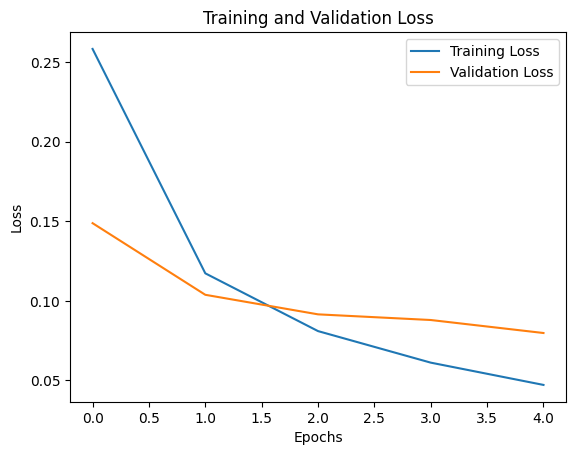

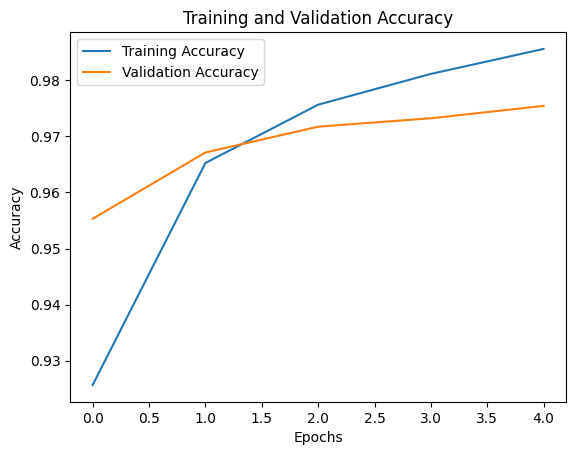

In [9]:
import matplotlib.pyplot as plt

# Plotting the Training and Validation Loss
plt.plot(history.history['loss'] , label='Training Loss')
plt.plot(history.history['val_loss'] , label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plotting the Training and Validation Loss
plt.plot(history.history['accuracy'] , label='Training Accuracy')
plt.plot(history.history['val_accuracy'] , label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()